In [ ]:
import pandas as pd

# Load the survey dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"  # Example dataset
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Display the structure of the dataset
print(df.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null

In [ ]:
# Handle missing values (e.g., filling or dropping)
df.fillna(method='ffill', inplace=True)

# Convert categorical data (if necessary)
df['sex'] = df['sex'].astype('category')

# Display cleaned data
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False    C  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True    C  Southampton    no   True  


<ipython-input-4-cd0709a200bb>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


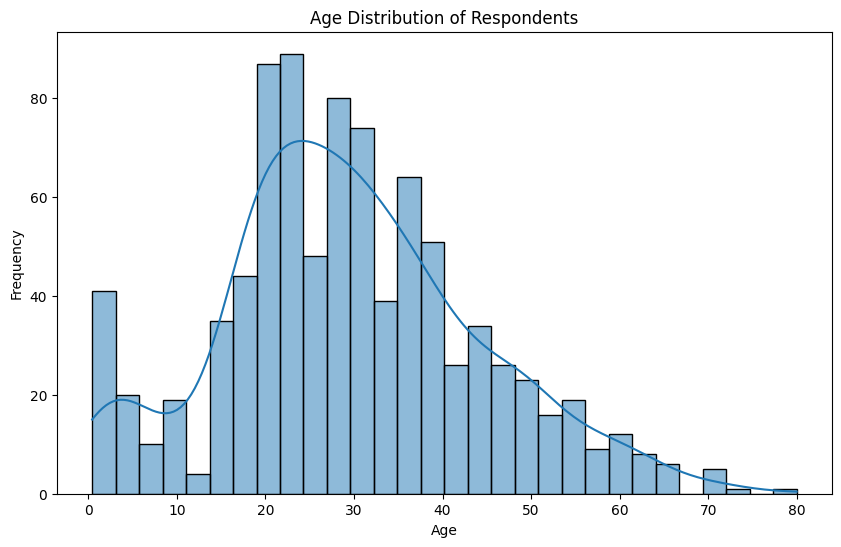

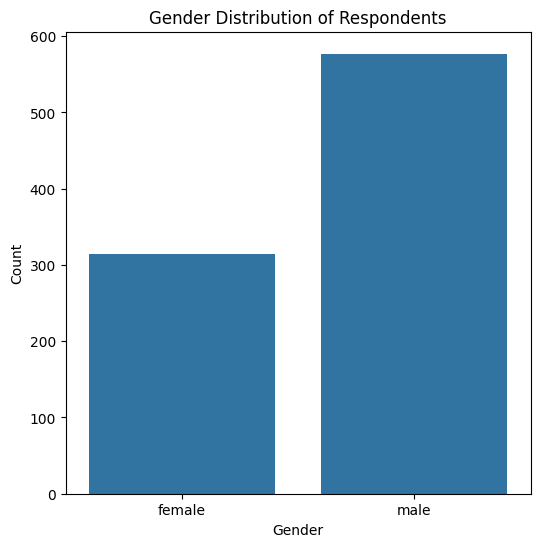

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution of Respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


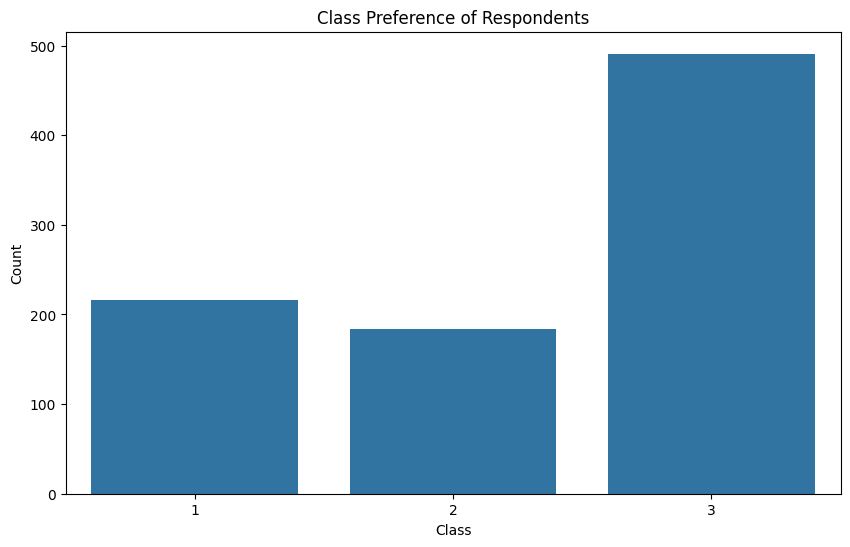

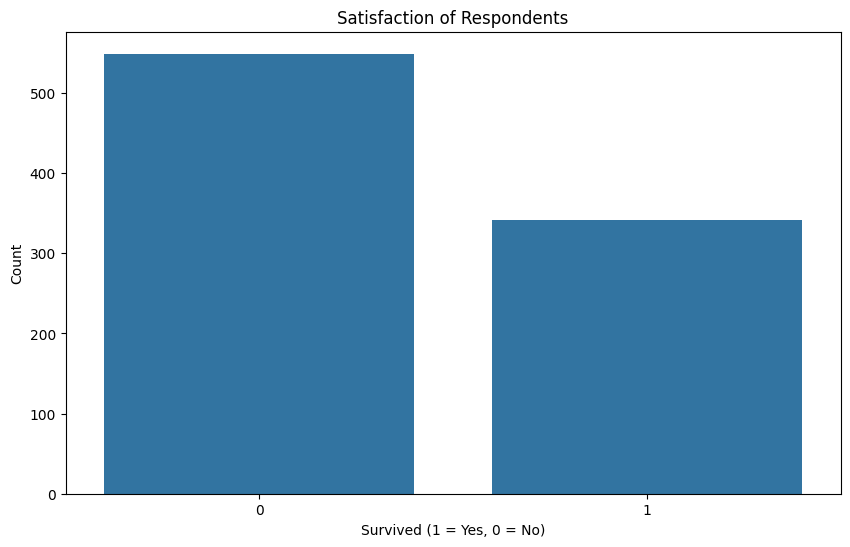

In [ ]:
# Class preference
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', data=df)
plt.title('Class Preference of Respondents')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Satisfaction (using survival as a proxy)
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', data=df)
plt.title('Satisfaction of Respondents')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


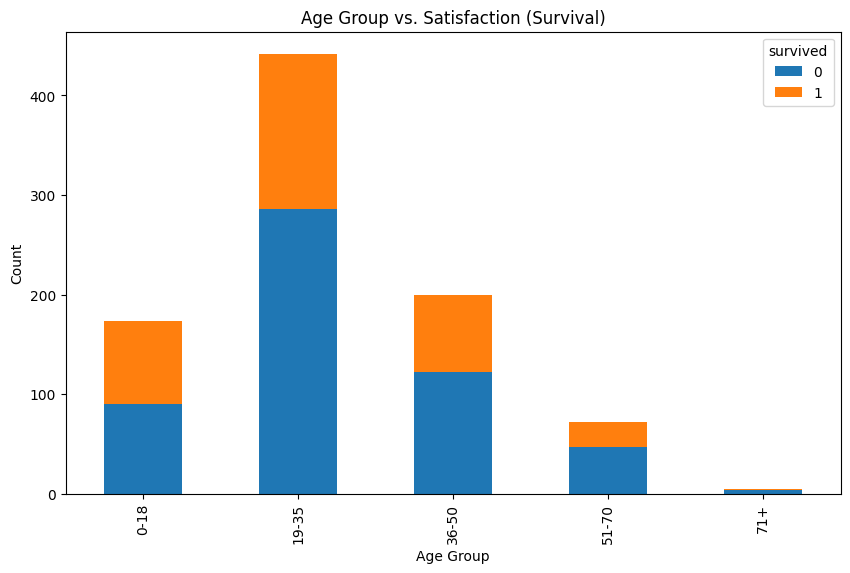

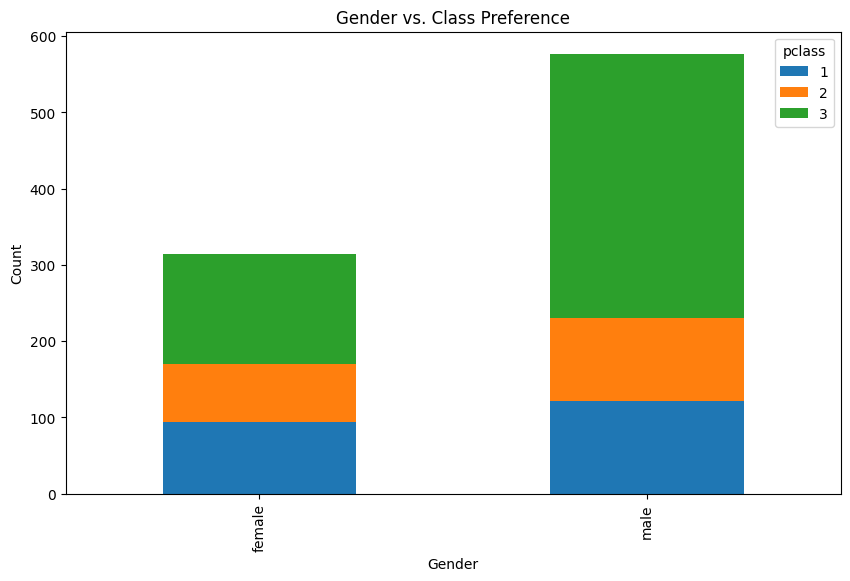

In [ ]:
# Cross-tabulation: Age vs. Satisfaction
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 70, 100], labels=['0-18', '19-35', '36-50', '51-70', '71+'])
age_satisfaction = pd.crosstab(df['age_group'], df['survived'])

# Visualizing age vs. satisfaction
age_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Age Group vs. Satisfaction (Survival)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Cross-tabulation: Gender vs. Class Preference
gender_class = pd.crosstab(df['sex'], df['pclass'])

# Visualizing gender vs. class preference
gender_class.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender vs. Class Preference')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
